## TCC BI 2019_4_Stocker


## Downtime classification in mining maintenance Kpi`s,  Based on time usage model. 
#### Application of Semi Supervised Classification using Autoencoders to compress the data into a low-dimensional space then apply the most powerful simple kind of models for classification.

Prepared by: 

Rodolfo Stocker


##### Matrícula: 192.110.243

#### Approaches


There are 3 outlier detection approaches:
1. Determine the outliers with no prior knowledge of the data. This is analogous to unsupervised clustering by AE to feature extraction from a latent space with aims to find a new, smaller - dimensional  representations that capture the main features, sunch as a preprocessing stage. The main idea behind this approach is to learn a low level representation $\hat{W}$ from a high level dimentional data. 

2. Model both normality and abnormality. This is analogous to supervised classification and need labeled data.
3. Model only normality. This is a blend of the kind above called novelty detection and is analogous to semi-supervised recognition. It needs labeled data that belong to the normal class.
**I will focused mainly with first and third approach, among the others methods.
It is the most common case. Most datasets don’t have labeled data concerning outliers**. And both has the same aim which is “Compress” high-dimensional data into a smaller-dimensional, more meaningful subspace.


##### Imported Libreries

In [ ]:
# This cell imports and configures the Python libraries needed.

# Regular Libraries
import numpy as np
import pandas as pd

# Statistic Libraries
import scipy.stats as stats

# Plotting libraries
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Sklearn libraries
import sklearn

# Preprocesing Libraries
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Others Libraries
import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

import random
# Set a Seed to reproducibility
seed = 42
random.seed(seed)

##### Firstable, I will begin with EDA, the common prior stage at any kind Modeling.

##### Outline: **Gather Sense of our data**
##### - Understand the distribution of the data that was provided.
##### - Determine the number of Clusters, I am going to use and decide which one has a better **wscc** and davies bouldin scores.


##### Loading Dataset

In [ ]:
data = pd.read_csv('/content/0206DatasetCH01TCCBI_csv.csv', sep=';', header='infer',decimal=',') #,index_col='Dates', parse_dates=True,
''' Load Data '''
df = pd.DataFrame(data)

##### Exploratory Data Analisys (EDA)


In [ ]:
df.shape # 360 rows and 17 columns.
'''the shape atribute returns us a tuple corresponding to the dimensions of the df array'''

(360, 17)

##### The cell above return the shape of data, as a tuple from the long format or tidy dataset, corresponding to the dimensions of the dataframe array ((m, n) of key-values pairs), 360 rows and 17 columns respectively. Clearly the Data is unbalanced and shown a year of operational records, the dataset available , and whichever be the approach  for deeper analysis. 

##### QQ Dataset and Descriptive Statistics

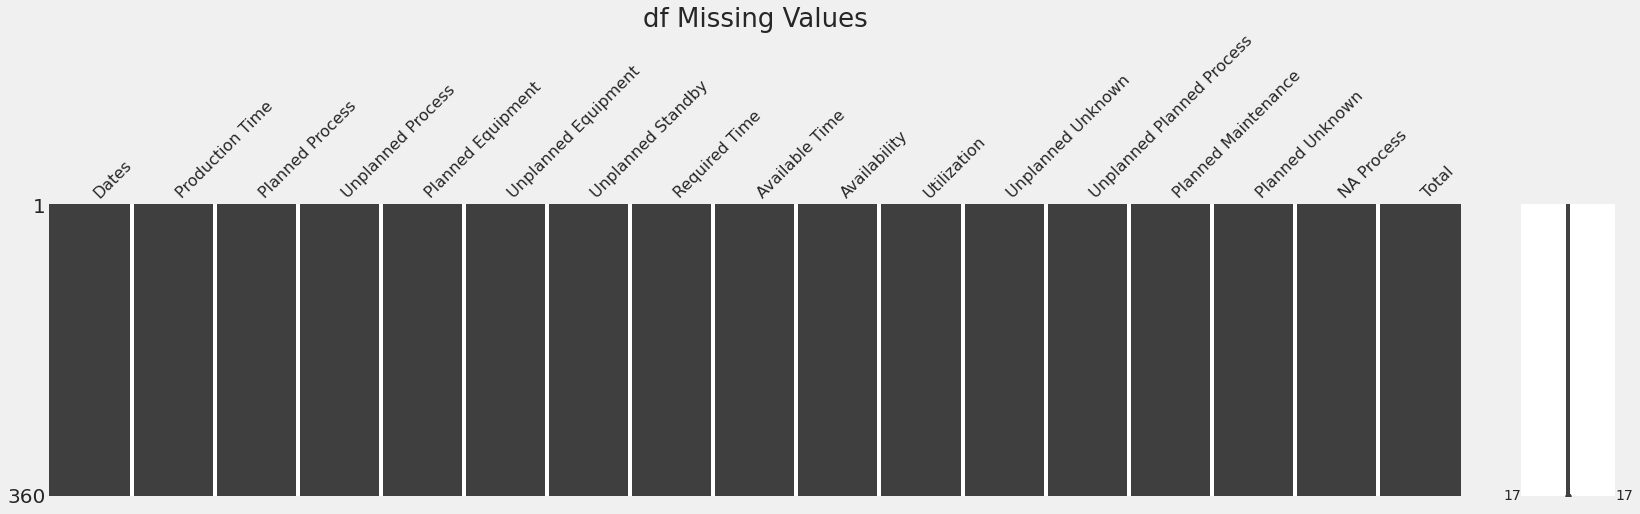

In [ ]:
import missingno as msno

plt.style.use('fivethirtyeight')
ax=msno.matrix(df,figsize=(25, 5))
"""Returns a matrix visualization of the nullity of the given DataFrame."""

# Decorations
plt.title('df Missing Values', fontsize=26)
ax.get_figure().savefig("datanomissing.png")
plt.show()

##### Descriptive statistics and exploring Dataset

In [ ]:
df.describe(percentiles=[.25, .5, .75, 0.8]) # Return Percentiles are used to get an idea of the ranking of a number given a list numbers.
'''A DataFrame holding the descriptive statistics of the column values in the source df.'''

,Production Time,Planned Process,Unplanned Process,Planned Equipment,Unplanned Equipment,Unplanned Standby,Required Time,Available Time,Availability,Utilization,Unplanned Unknown,Unplanned Planned Process,Planned Maintenance,Planned Unknown,NA Process,Total
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.0,360.000000,360.0,360.000000,360.000000
mean,9.600361,1.459417,0.205472,1.456500,4.630639,6.647639,17.352361,11.265250,0.569500,0.553606,0.060917,0.0,2.912972,0.0,0.223139,14.399639
std,10.004644,3.738243,0.564037,3.738079,8.580285,9.438561,9.438561,9.636942,0.436425,0.479013,0.442023,0.0,7.476106,0.0,0.763208,10.004644
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,2.745000
50%,5.710000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,12.000000,0.666500,0.913500,0.000000,0.0,0.000000,0.0,0.000000,18.290000
75%,21.255000,0.000000,0.000000,0.000000,3.207500,13.000000,24.000000,22.190000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,24.000000
80%,22.170000,0.000000,0.000000,0.000000,10.000000,18.050000,24.000000,23.512000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,24.000000
max,24.000000,12.000000,3.500000,12.000000,24.000000,24.000000,24.000000,24.000000,1.000000,1.000000,5.000000,0.0,24.000000,0.0,5.100000,24.000000


In [ ]:
df.head()
'''Return five rows sample by default from df dataset.'''

,Dates,Production Time,Planned Process,Unplanned Process,Planned Equipment,Unplanned Equipment,Unplanned Standby,Required Time,Available Time,Availability,Utilization,Unplanned Unknown,Unplanned Planned Process,Planned Maintenance,Planned Unknown,NA Process,Total
0,01/07/2010,24.0,0.0,0.0,0.0,0.0,0.0,24.0,24.0,1.0,1.0,0.0,0,0.0,0,0.0,0.0
1,02/07/2010,0.0,0.0,0.0,0.0,24.0,0.0,24.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,24.0
2,03/07/2010,0.0,0.0,0.0,0.0,24.0,0.0,24.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,24.0
3,04/07/2010,0.0,0.0,0.0,0.0,24.0,0.0,24.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,24.0
4,06/07/2010,24.0,0.0,0.0,0.0,0.0,0.0,24.0,24.0,1.0,1.0,0.0,0,0.0,0,0.0,0.0


##### Plotting a  visual overview around all Numeric Variables without Transformation (scaling).
##### Do my data follow some pattern of distribution?  

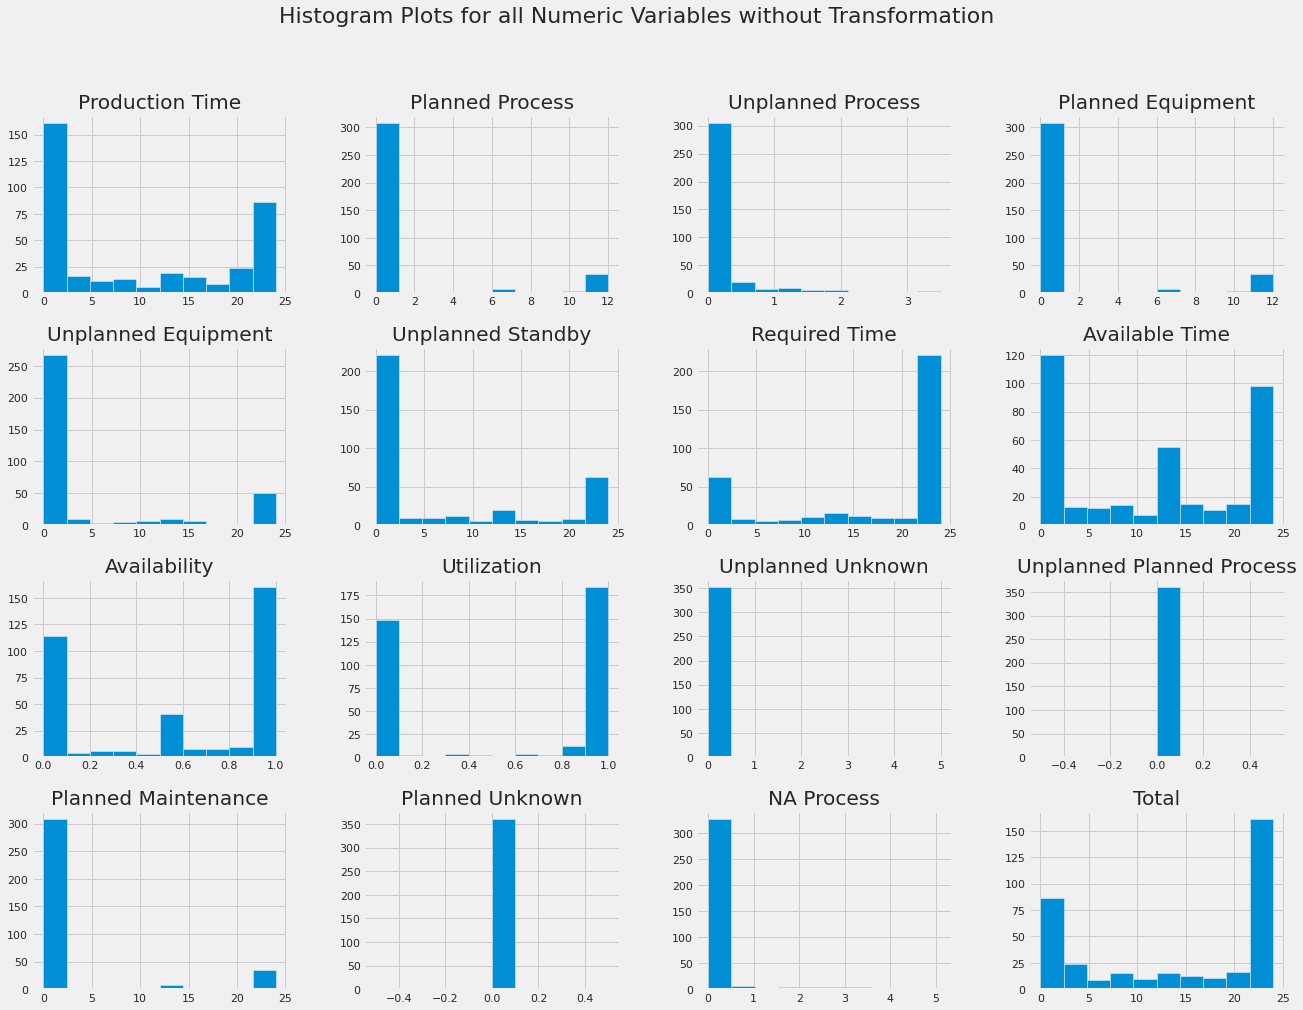

In [ ]:
df.hist(figsize=(20,15),bins=10)
"""Plot a grid of histograms (frequencies) from the DataFrame"""

# Decorations
plt.style.use('fivethirtyeight')
plt.suptitle("Histogram Plots for all Numeric Variables without Transformation",fontsize=22)
ax.get_figure().savefig("Histogram Plots for all Numeric Variables without Transformation.png")
#plt.tight_layout()  
plt.show()

#####**The frequency histo Plots displays, if take the outputs attributes distributions called the  result Kpi's ;Availability and Utilization both is bimodal. The two peaks in a bimodal distribution also represent two local maximums; these are points where the data points stop increasing and start decreasing in term of frequency.**

##### **Heatmap**

##### The primary purpose of the heatmap is to show the correlation matrix by pairwise attributes visualization. It helps find the relationship between features and which features are best for lift hypothesis before apply any Machine Learning model building. later in the next cell will be usefull to take some variables to plot a couple scatter plots.

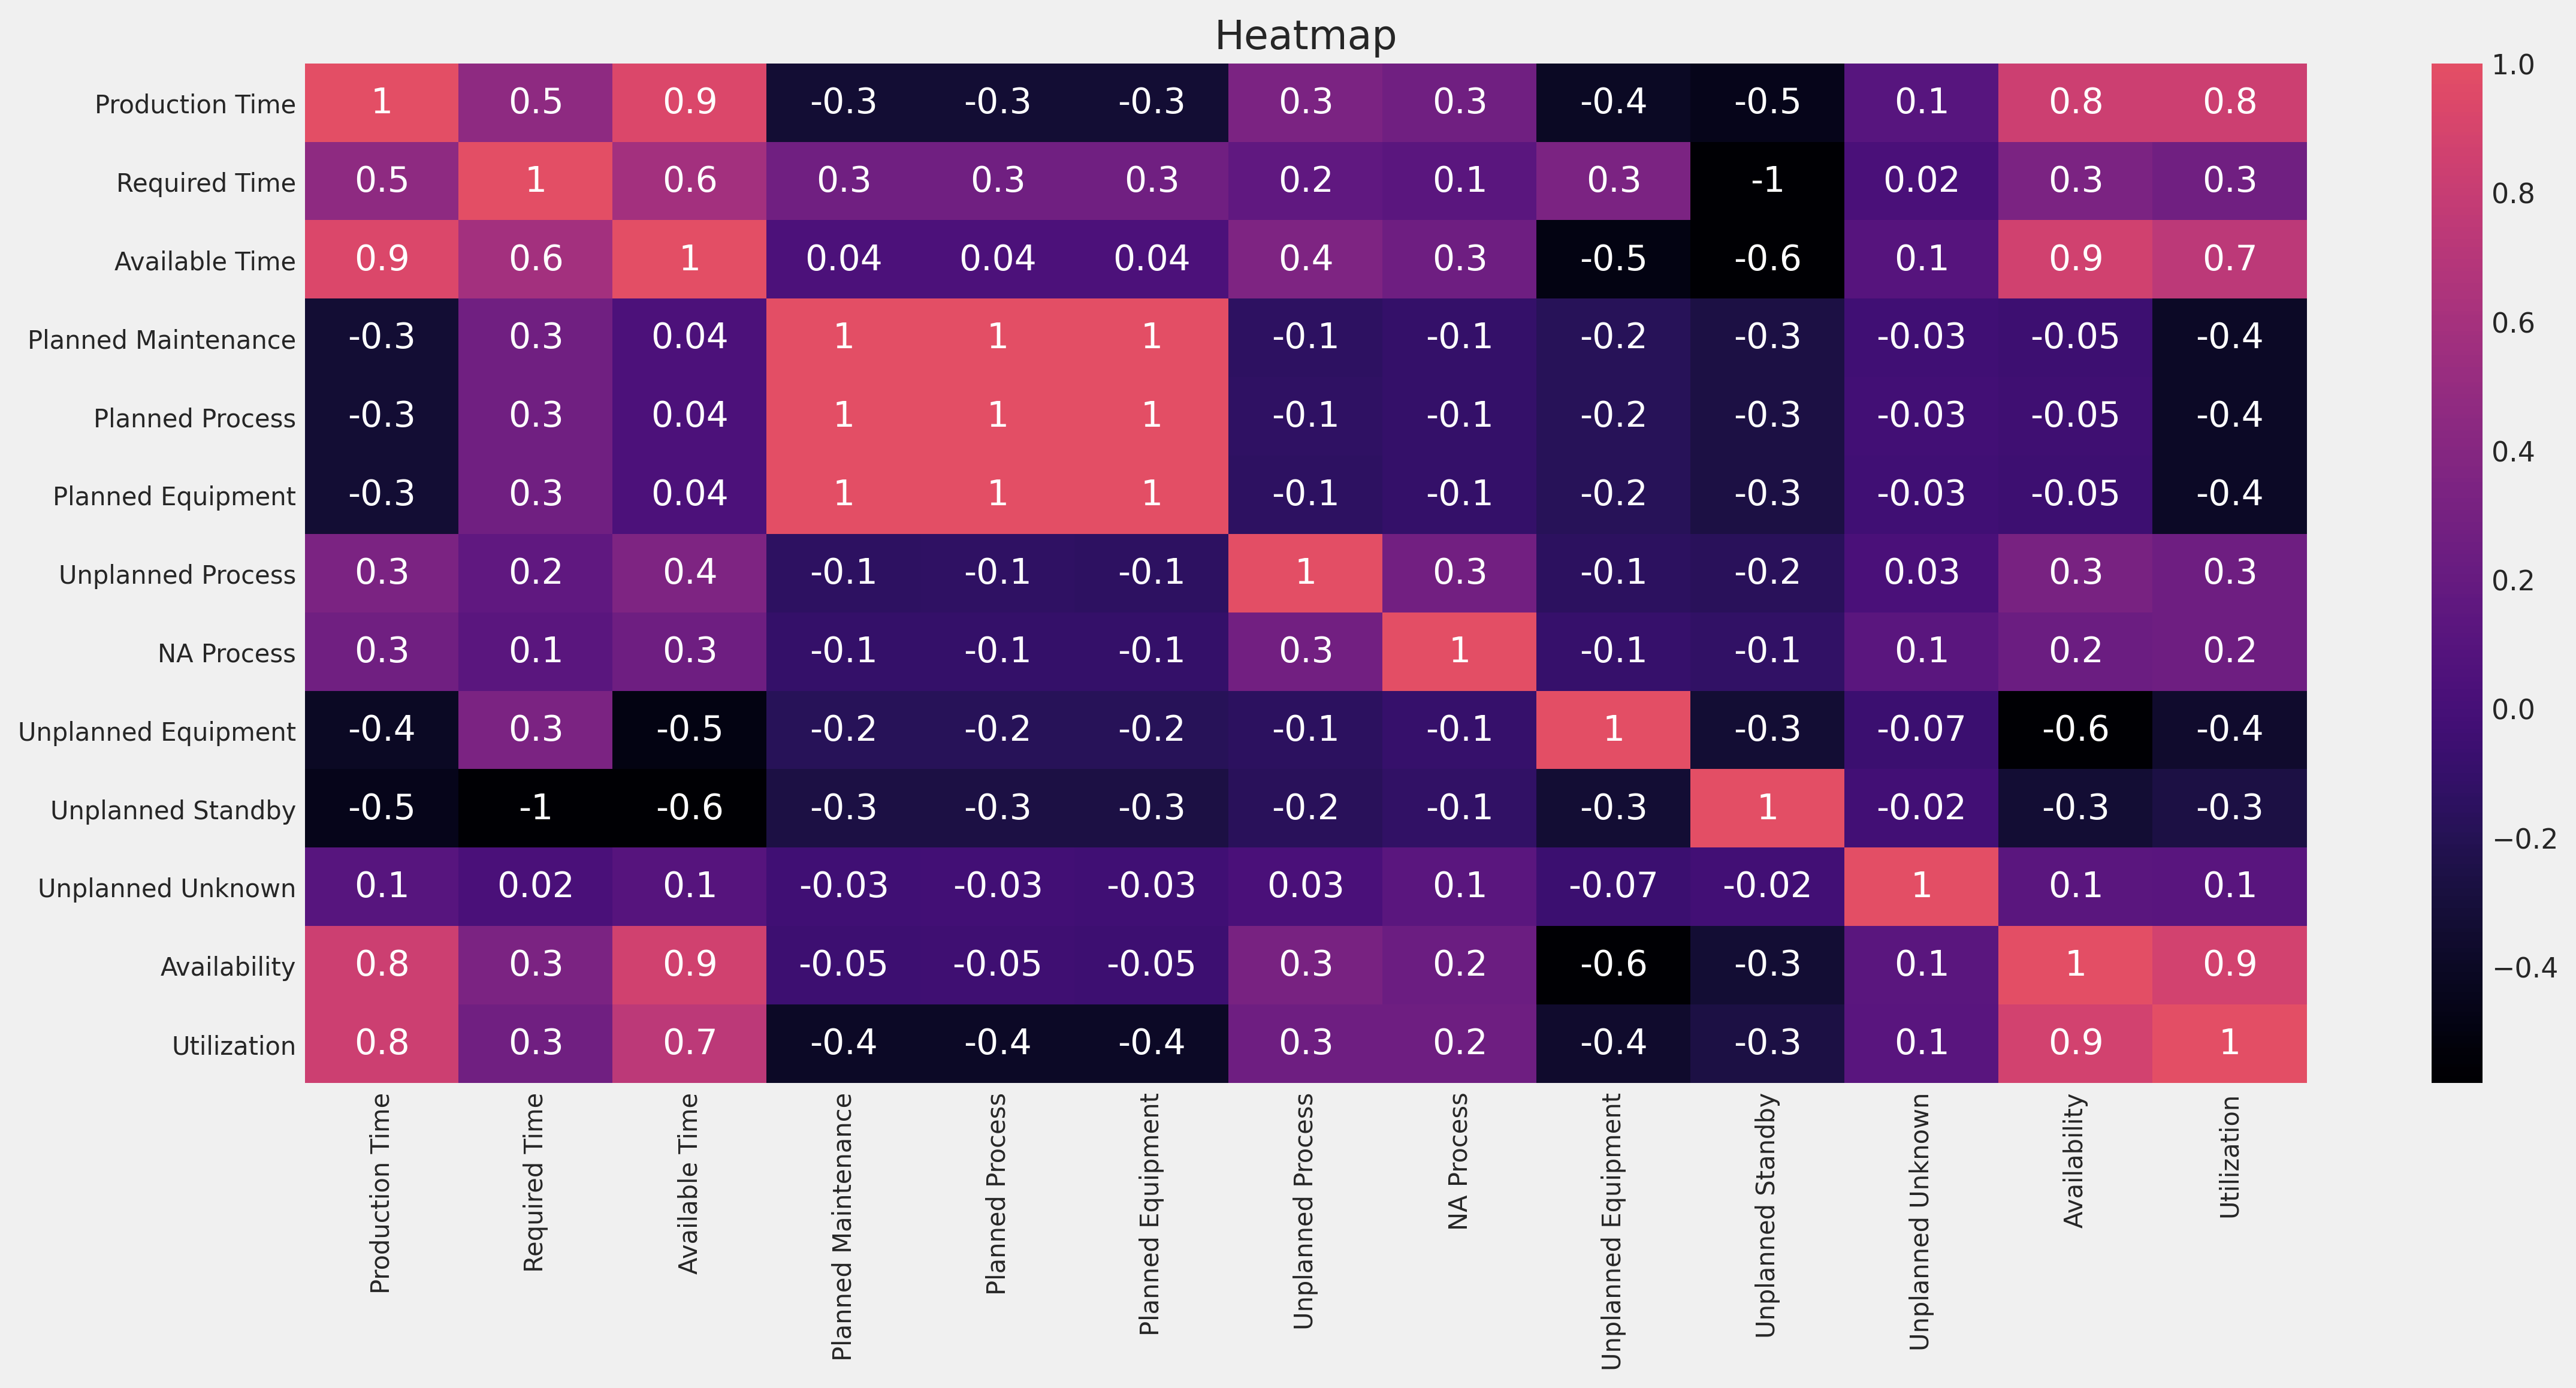

In [ ]:
filter=df[['Production Time', 'Required Time', 'Available Time', 'Planned Maintenance','Planned Process' , 'Planned Equipment', 'Unplanned Process','NA Process', 'Unplanned Equipment', 'Unplanned Standby','Unplanned Unknown','Availability','Utilization']]
#filter_=df[['Planned Maintenance', 'Planned Equipment', 'Unplanned Equipment', 'Planned Process', 'Unplanned Process', 'NA Process', 'Unplanned Standby', 'Unplanned Unknown']] # note the attributes Planned Maintenance, planned process, planned  equipment has correlation equal 1 and should be remobed from the analisys


sns.heatmap(filter.corr(),cmap='magma',annot=True,fmt=".1g",center=0.7,robust=True)
'''Heat maps return numeric tabular data where the cells are colored depending upon the contained value.'''

# Decorations 
plt.figure(figsize=(16,7), dpi= 300) 
plt.style.use('fivethirtyeight')
plt.title('Heatmap', fontsize=16)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
ax.get_figure().savefig("Heatmap.png",bbox_inches='tight', bpi=600)
plt.show()

##### As only numerical features can show the correlation,the correlation matrix shows us how the variables are correlated to each other on a scale of -1 to 1. 1 being positively correlated and -1 being inversely correlated. 

##### As you may noticed, somes pearson correlation index (values equal 1)  in between attributes can suggest to exclude from the analysis, due the multicollinearity and those can be explained by others variables and that way some of them become in  redundant information.  However, I will stick with a few others because they will be part of the analysis.

##### Outputs Kpi`s Distribution plots

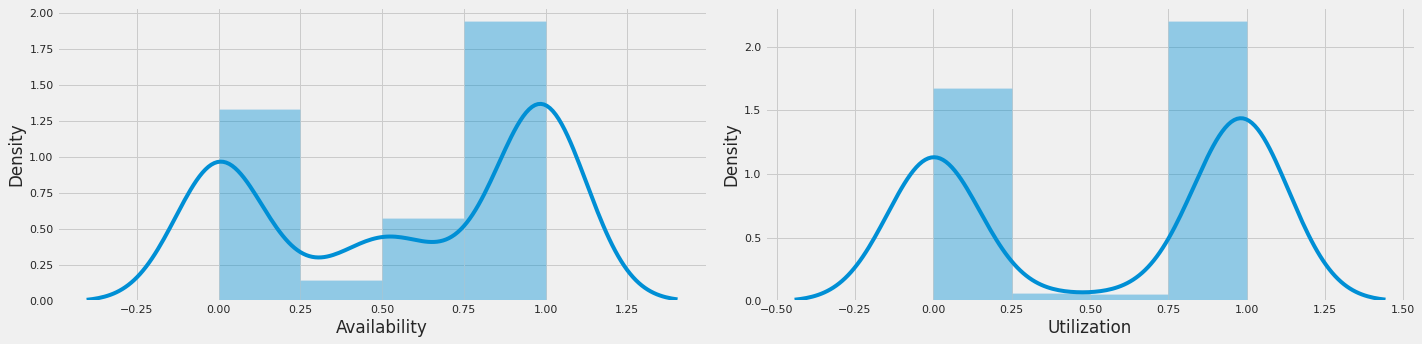

In [ ]:
# Distribution Output Kpi´s plots without preprocessing

plt.figure(figsize = (20, 5))
plt.style.use('fivethirtyeight')
plotnumber = 1

for col in ['Availability','Utilization']:
    if plotnumber <= 2:
        ax = plt.subplot(1, 2, plotnumber)
        sns.distplot(df[col])
        
    plotnumber += 1
# Decorations    
plt.tight_layout()
plt.show()

##### **Definitions Result Kpi:**

##### Utilization: (dtype float).The percentage of calendar time the equipment was performing its primary function, This is calculated by Production time/ Available time (near to zero meaning  worse and better performace can achive above 80%).

#####  Availability: (dtype float).The inherent condition of an equipment (under combined aspects of its reliability, maintainability and maintenance support) to perform their required function in a moment determined, in a period of time, or at any given time. The availability of an equipment does not necessarily imply that it is working, however, is all ready to function. This is calculated by Available time/Required time (near to zero meaning  worse and better performace can achive above 80%).

##### Box Plots of output attributes : Availability and Utilization without Transformation

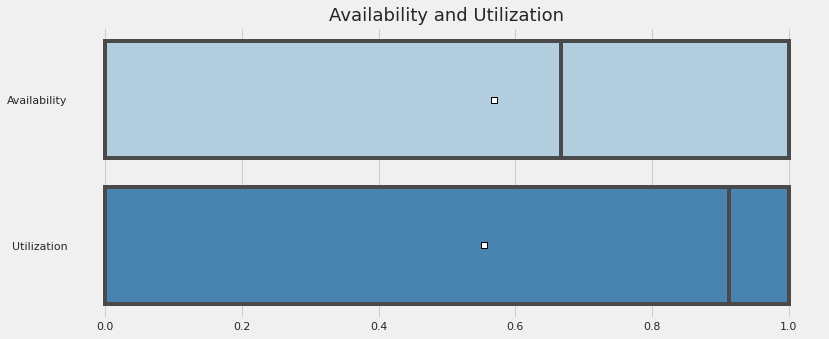

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
#plt.style.use('fivethirtyeight')

sns.boxplot(data=df[['Availability','Utilization']],
            palette="Blues",
            orient="h",
            width=0.8, 
            showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
"""Draw a box plot to show distributions with respect to attributes."""

# Decorations
plt.title('Availability and Utilization', fontsize=18)
ax.get_figure().savefig('Availability and Utilization Boxplot without Transformation.png')
plt.show()

#####**The Box Plots shown above from both variables , most values are concentrated on the right of the mean with extreme values to the left, therefore skewed distributions.**
##### The distributions shown that both has  a positive tail and negative tail,  it seems the positive tail is equal than the negative tail.                                              However, same time the distributions both is left skewed  distribution (skewed < 0), most values are concentrated on the right of the mean with extreme values to the left and finally  both distribution look like bimodals distributions.

##### Color-coded scatter plots of outputs or results Kpi's: Availability and Utilization.

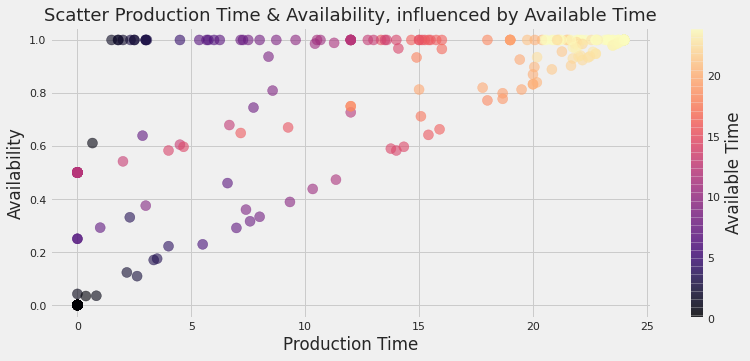

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
plt.style.use('fivethirtyeight')

df.plot.scatter(x='Production Time',y='Availability',s=100, c='Available Time',colormap='magma',ax=ax, alpha =0.6)
"""Create a scatter plot with varying marker point size and color."""

# Decorations
plt.title('Scatter Production Time & Availability, influenced by Available Time', fontsize=18)#'Scatter Available Time & Production Time'
ax.get_figure().savefig('Scatter Production Time & Availability, influenced by Available Time') #Scatter_Available Time & Production Time.png.png'
plt.show()

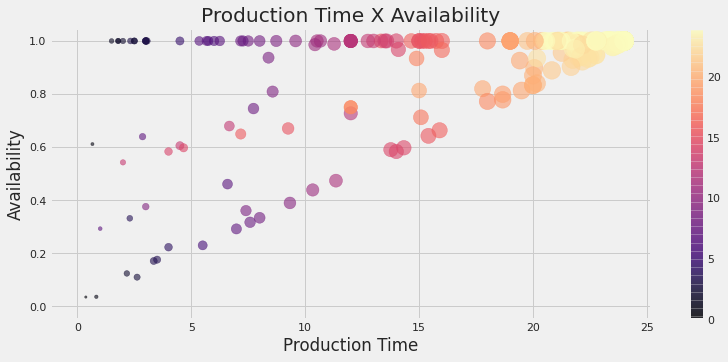

In [ ]:
figsize=(12,5)
fig = plt.figure(figsize=figsize)

df_=df.loc[:,['Production Time','Availability']].values

plt.scatter(df_[:,0], 
            df_[:,1], 
            c=df['Available Time'],
            s=df_[:,0]*15, 
            cmap='magma',
            alpha=0.6)
plt.colorbar()
plt.xlabel('Production Time')
plt.ylabel('Availability')
plt.title('Production Time X Availability')
plt.grid(True) 
plt.show()


In [ ]:
print("Skewness: %f" % df['Utilization'].skew())
print("Kurtosis: %f" % df['Utilization'].kurt())

Skewness: -0.251340
Kurtosis: -1.903902


The scatterplot above suggests that Production Time  and Availability are positively correlated, where the Crusher  with higher Production Time typically also tend to had more Availability. This pattern makes sense, since high Availability is typically associated with higher Production Time.

By using scatter plots to display the relationships between three variables, by color-coding the points.

For instance, to understand how Available Time affect the relationship between Production Time and Availability, by color-code the points by 'Available Time', and plot the other two columns ('Production Time', 'Availability') on the axes.

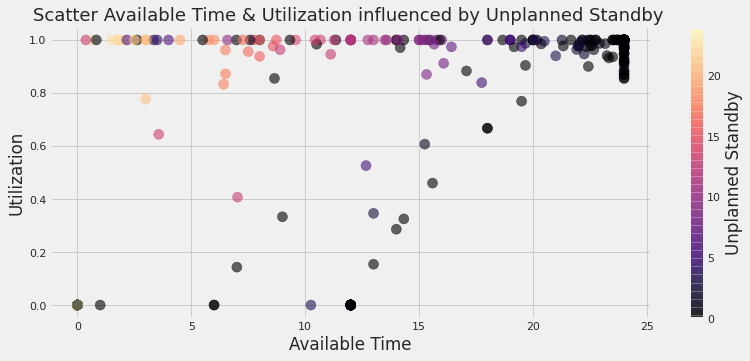

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
plt.style.use('fivethirtyeight')

df.plot.scatter(x='Available Time',y='Utilization',s=100, c='Unplanned Standby',colormap='magma',ax=ax, alpha =0.6)
"""Create a scatter plot with varying marker point size and color."""

# Decorations
plt.title('Scatter Available Time & Utilization influenced by Unplanned Standby ', fontsize=18) #'Scatter Unplanned Standby & Available Time'
ax.get_figure().savefig('Scatter Available Time & Utilization influenced by Unplanned Standby ')#'Scatter_Unplanned Standby & Available Time.png'
plt.show()

The second scatterplot above suggests that Available Time  and Utilization are positively correlated, where the Crusher  with higher Available Time typically also tend to had more Utilization. This pattern makes sense, since high Utilization is typically associated with higher Available Time.

Using scatter plots to display the relationships between three variables, for instance, to understand how Unplanned Standby affect the relationship between Available Time and Utilization, by color-code the points by 'Unplanned Standby', and plot the other two columns ('Available Time', 'Utilization') on the axes.

##### **EDA Summary:**

##### **The Time Usage Model** : It is a model used to allocate time in different categories in columns (the Dataframe Columns attributes) , for the purpose of compare maintenance performance "Utilization and Availability" on a time period based in a regular work day of 24 hours.

##### The DataSet reflect a year of operations records, 360 rows and 17 attributes. 

##### There are no "Null" values, so we don't have to work on ways to replace values.

##### The attributes (columns) has a hight coefficient correlation sunch as; Planned Process (1), Planned Equipment (1), Unplanned Standby (-1) will be part to the analysis.

##### The following columns, I will throw away from the cluster analysis:  Dates, Production Time, Required Time, Available Time , because , has been mentioned above make more sense the analysis based on the time usage model for root features, unscheduled downtime (Process,equipments), scheduled downtime (Process,equipments).

##### for instance Unplanned Process, Unplanned Equipment, Unplanned Standby, Unplanned Unknown, NA Process because ** all these attributes can be labaled as outliers**. Note: An unexpected or unplanned event is always in regard  to an equipment required function (related to process itselft or equipment main function) in way of those occurs when the main function cannot be performed or has a performance that falls outside the performance requirement almost cases bellow a threshold (i.e. x crushed ore tons/hour ).

##### A Normalization will be applied in the dataset before entry to the models.

##### **Note that the columns Utilization and Availability** are both called result kpi or the output variables expressed without measured unit or as adimentionals in %/%.

#### Preprocessing

##### 1. Standardization:  

##### The goal of applying Feature z-scaling is to make sure features are on almost the same scale so that each feature is equally important and make it easier to process later by most ML algorithms.

##### Given that, I will use proximity based algorithms that are scale sensitive and require all features to be on the same scale. KMeans will place more weight or emphasis on features with larger variations, and those features will impose more influence on the shape of the final group.




In [ ]:
#Feature Scaling
scaler = StandardScaler()

scaler.fit(df[['Planned Maintenance', 
               'Planned Equipment', 
               'Unplanned Equipment', 
               'Planned Process' , 
               'Unplanned Process', 
               'NA Process', 
               'Unplanned Standby', 
               'Unplanned Unknown']])

X_scale = scaler.transform(df[['Planned Maintenance', 
                               'Planned Equipment', 
                               'Unplanned Equipment', 
                               'Planned Process' , 
                               'Unplanned Process', 
                               'NA Process', 
                               'Unplanned Standby', 
                               'Unplanned Unknown']])
'''return the scaled features have a mean of  and a variance of .'''

df_scale = pd.DataFrame(X_scale, columns=['Planned Maintenance', 
                                          'Planned Equipment', 
                                          'Unplanned Equipment', 
                                          'Planned Process' , 
                                          'Unplanned Process', 
                                          'NA Process', 
                                          'Unplanned Standby', 
                                          'Unplanned Unknown'])
df_scale.head()

,Planned Maintenance,Planned Equipment,Unplanned Equipment,Planned Process,Unplanned Process,NA Process,Unplanned Standby,Unplanned Unknown
0,-0.39018,-0.390181,-0.540435,-0.390945,-0.364795,-0.292777,-0.705287,-0.138005
1,-0.39018,-0.390181,2.260568,-0.390945,-0.364795,-0.292777,-0.705287,-0.138005
2,-0.39018,-0.390181,2.260568,-0.390945,-0.364795,-0.292777,-0.705287,-0.138005
3,-0.39018,-0.390181,2.260568,-0.390945,-0.364795,-0.292777,-0.705287,-0.138005
4,-0.39018,-0.390181,-0.540435,-0.390945,-0.364795,-0.292777,-0.705287,-0.138005


#### **Data Engeniering**

##### **Dendogram**

###### A dendrogram is a tree-like structure that explains the relationship between all the data points in the space.

In [ ]:
# Clustering Libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

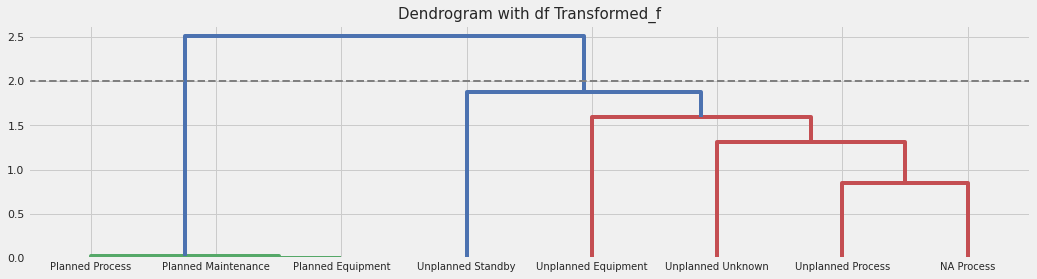

In [ ]:
plt.figure(figsize = (16, 4))

dendo = dendrogram(linkage(df_scale.corr('kendall'),
                           method='complete',
                           metric='euclidean'),
                           leaf_rotation=None,
                           leaf_font_size=10, 
                           labels=df_scale.columns) # arg_dedrogram:count_sort='ascending'#(arg_linkage:method='single','complete','centroid','weighted','ward')
""" A hierarchical clustering to plot a dendrogram with the df_scale (a filter from df scaled)"""

# Decorations
plt.axhline(y=2, c='grey', lw=2, linestyle='dashed')
ax.set_title('Hierarchical Clustering with df Transformed_f')
plt.title('Dendrogram with df Transformed_f', fontsize = 15)
plt.show()

##### Given the dataset **df_scale** to be clustered and a NxN similarity matrix. The unsupervised heararchical dendrograme in a complete-linkage clustering method. It is considering the distance between one cluster and another cluster to be equal to the greatest distance from any member of one cluster to the any member of the other cluster, **

##### In general, the model of Time Usage, is composed of  explanatory attributes and the Kpi´s of results,where is intrinsically underlies the unplanned downtime ,explainable by either operations (process) or maintenance causations.

##### note: downtime meaning the time when an equipment is required but is unavailable due to conditions or reasons under the direct control of those responsible for the process and require inmediate action when it`s notified,  is used to control the risk that can lead to plant malfunction, breakdown, or unplanned shutdown and **can impact throughput while increasing maintenance cost**.

####**Clustering using K-Means:**

##### Another  unsupervised learning algorithms **K-Means** that solve clustering problem to Find Cluster (classes) of samples on a Dataset. 

##### The appropriate cluster of data that should be grouped together by a geometric similarity approach    by distance k-means++ (is a smart centroid initialization technique) to discover underling structure on unlabeled data.

##### The goal of KMeans is to identify similar data points and cluster them together while trying to distance each cluster as far as possible. Its “similarity” calculation is determined via Euclidean distance or an ordinary straight line between two points. The shorter the Euclidean distance the more similar the points are.

In [ ]:
# Clustering Libraries
from sklearn.cluster import KMeans

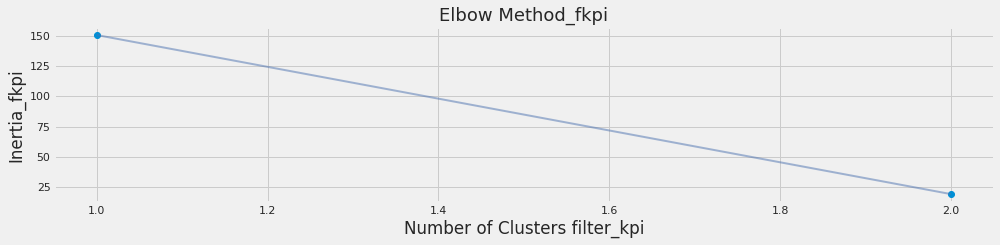

In [ ]:
'''Availability and Utilization WSCC Score without preprocessing'''

filter_kpi=filter[['Availability','Utilization']].iloc[: , :].values
inertia_fkpi = []
for k in range(1 , 3):
    algorithm_fkpi = (KMeans(n_clusters = k ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42  , algorithm='full') )
    '''Clustering by min inertia score of Sum of squared distances of samples to their closest cluster center.'''
    algorithm_fkpi.fit(filter_kpi)
    ''' ML technic to identify clusters of data objects in a dataset'''
    inertia_fkpi.append(algorithm_fkpi.inertia_)
    ''' Sum of squared distances of samples to their closest cluster center.'''

labels_fkpi = algorithm_fkpi.labels_

plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 ,3))
plt.plot(np.arange(1 , 3) , inertia_fkpi , 'o',markersize=6)
plt.plot(np.arange(1 , 3) , inertia_fkpi , 'b-' , linewidth=2 , alpha = 0.5)
plt.title('Elbow Method_fkpi', fontsize=18)
plt.xlabel('Number of Clusters filter_kpi') , plt.ylabel('Inertia_fkpi')
plt.show()

In [ ]:
### To understand if k has a meaning or sense in 2 dimention on output Kpi´s###

model_fkpi = KMeans(n_clusters=2,random_state=42,algorithm='full')
"""Clustering by min inertia score of Sum of squared distances of samples to their closest cluster center."""

model_fkpi.fit(filter[['Availability','Utilization']]) 

print(model_fkpi.labels_)

[1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0
 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]


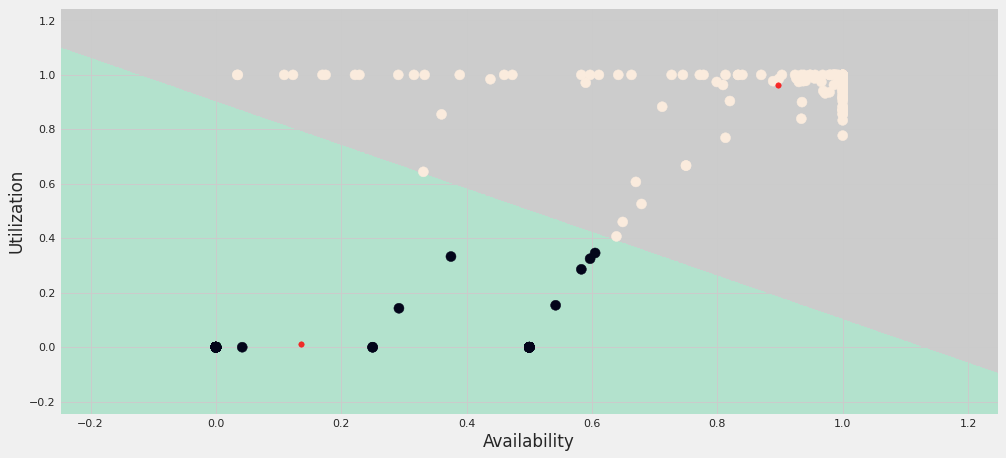

In [ ]:
### A Voronoi diagram is a partition of a plane into regions close to each of a given set of objects.###
h = 0.001

x_min, x_max = filter_kpi[:, 0].min() - 0.25, filter_kpi[:, 0].max() + 0.25
y_min, y_max = filter_kpi[:, 1].min() - 0.25, filter_kpi[:, 1].max() + 0.25

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = algorithm_fkpi.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')


plt.scatter( x = 'Availability' ,y = 'Utilization' , data = filter, s = 100, c = labels_fkpi )


plt.scatter(x = model_fkpi.cluster_centers_[: , 0] , y =  model_fkpi.cluster_centers_[: , 1] , s = 30 , c = 'red' , alpha = 0.8)
plt.ylabel('Utilization') , plt.xlabel('Availability')
plt.title('Voronoi diagram', fontsize=18)## added before or after

plt.show()

#### The  scatterplot above suggests that Availability  and Utilization are positively correlated, where the Crusher with higher Availability typically also tend to had more Utilization. This pattern makes sense, since high Utilization is typically associated with higher Availability.

In [ ]:
###---New Cluster from df_scale with all relevant features from time usage model ( higth dimentional space )---###

# Create a KMeans instance with 2 clusters.

model_with_Att_Trans_01_df_scale = KMeans(n_clusters=2,
                                           random_state=42,
                                           algorithm='full') # "full" for sparse data.
"""Clustering by min inertia score of Sum of squared distances of samples to their closest cluster center."""

# Fit model to samples
model_with_Att_Trans_01_df_scale.fit(df_scale)
# Labels of each point
print(model_with_Att_Trans_01_df_scale.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


##### KMeans selected a random point for each centroid. The number of centroids is equal to the number of clusters selected. The centroid is the point around which each cluster is built around.

##### Second, the Euclidean distance is calculated between each point and each centroid. Each point will be initially assigned to the closest centroid/cluster. Each data point can belong to one cluster or centroid. The algorithm then averages Euclidean distance (between each point and centroid) for each cluster and this point becomes the new centroid. This process of averaging the Euclidean distances within clusters and assigning new centroids repeats until cluster centroids no longer move.

In [ ]:
###---Join the base with the respective labels---###

df_scale_clusters=df_scale.copy()
df_scale_clusters['cluster'] = model_with_Att_Trans_01_df_scale.labels_
df_scale_clusters.head()

,Planned Maintenance,Planned Equipment,Unplanned Equipment,Planned Process,Unplanned Process,NA Process,Unplanned Standby,Unplanned Unknown,cluster
0,-0.39018,-0.390181,-0.540435,-0.390945,-0.364795,-0.292777,-0.705287,-0.138005,0
1,-0.39018,-0.390181,2.260568,-0.390945,-0.364795,-0.292777,-0.705287,-0.138005,0
2,-0.39018,-0.390181,2.260568,-0.390945,-0.364795,-0.292777,-0.705287,-0.138005,0
3,-0.39018,-0.390181,2.260568,-0.390945,-0.364795,-0.292777,-0.705287,-0.138005,0
4,-0.39018,-0.390181,-0.540435,-0.390945,-0.364795,-0.292777,-0.705287,-0.138005,0


In [ ]:
###---Number of instances in each cluster---###

df_scale_clusters.cluster.value_counts()

0    312
1     48
Name: cluster, dtype: int64

##### Domain Knowledge: As, I have a certain level of knowledge and experience in the domain from which dataset was gathered. This expertise allow me to set the number of clusters, for a lowest level of granularity and model simplicity, I assume in the general population exists 2 cluster(normal and non normal).
##### Hypothesis Testing: Setting a specific number of clusters can also act as a test of a certain hypothesis we might have. For instance, when analyzing kpi´s of result Avalilability and Utilization present  in the same dataset we have a hunch there are 2 subgroups of downtime who is scheduled downtime, unsheduled downtime.

In [ ]:
# Cluster Percentages 
vc=df_scale_clusters.cluster.value_counts().to_frame().reset_index()

vc['Percent %'] = vc["cluster"].apply(lambda x : round(100*float(x) / len(df_scale_clusters.cluster), 2))
vc = vc.rename(columns = {"index" : "Cluster", "cluster" : "Count"})
vc

,Cluster,Count,Percent %
0,0,312,86.67
1,1,48,13.33


In [ ]:
###---This cell help to explain the cluster profile---###
print(model_with_Att_Trans_01_df_scale.cluster_centers_)

[[-0.38116433 -0.38116541  0.06612382 -0.38102846  0.05612238  0.04365478
   0.1042278   0.01215514]
 [ 2.47756815  2.47757515 -0.42980482  2.47668499 -0.36479545 -0.2837561
  -0.67748071 -0.07900841]]


In [ ]:
###---This cell help to explain the cluster profile---###
scaler.inverse_transform(model_with_Att_Trans_01_df_scale.cluster_centers_)

array([[ 6.73076923e-02,  3.36538462e-02,  5.19721154e+00,
         3.70192308e-02,  2.37083333e-01,  2.56410256e-01,
         7.63003205e+00,  6.62820513e-02],
       [ 2.14097917e+01,  1.07050000e+01,  9.47916667e-01,
         1.07050000e+01, -1.66533454e-16,  6.87500000e-03,
         2.62083333e-01,  2.60416667e-02]])

In [ ]:
###---This cell is usefull for checking the attributes Cluster Centers ---###

inversed_df_scale_cluster_centers_ = scaler.inverse_transform(model_with_Att_Trans_01_df_scale.cluster_centers_)

#scd_X_f = pd.DataFrame(data=scd_X_f, columns=['Planned Maintenance', 'Planned Equipment', 'Unplanned Equipment', 'Planned Process', 'Unplanned Process', 'NA Process', 'Unplanned Standby', 'Unplanned Unknown'])
df_scale_inversed_cluster_centers_ = pd.DataFrame(data=inversed_df_scale_cluster_centers_, columns=['Planned Maintenance', 'Planned Equipment', 'Unplanned Equipment', 'Planned Process', 'Unplanned Process', 'NA Process', 'Unplanned Standby', 'Unplanned Unknown'])

df_scale_inversed_cluster_centers_

,Planned Maintenance,Planned Equipment,Unplanned Equipment,Planned Process,Unplanned Process,NA Process,Unplanned Standby,Unplanned Unknown
0,0.067308,0.033654,5.197212,0.037019,2.370833e-01,0.256410,7.630032,0.066282
1,21.409792,10.705000,0.947917,10.705000,-1.665335e-16,0.006875,0.262083,0.026042


##### **Evaluating the quality Clustering by the elbow method**

##### When using unsupervised ML algorithms we often cannot compare our results against a known true label. In other words, I do not have a test set to gauge the performance of our model. That said, we still need to understand how well K-Means managed to cluster the data. I already know how tightly the data is contained within our clusters by looking at the Elbow graph and the number of clusters I selected.

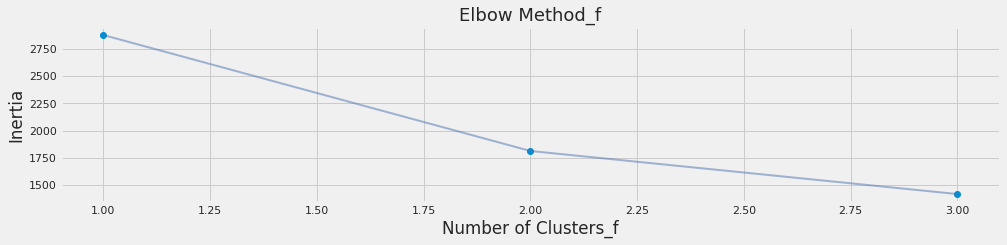

In [ ]:
'''df_scale WSCC Score with Attributes scaled'''
'''Dataframe Preprocessed WSCC Score'''

X1_f = df_scale.iloc[: , :].values 
inertia = []

for k in range(1 , 4):

    algorithm_f = (KMeans(n_clusters = k ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42  , algorithm='full') )
    '''Clustering by min inertia score of Sum of squared distances of samples to their closest cluster center.'''
    algorithm_f.fit(X1_f)
    inertia.append(algorithm_f.inertia_)
    ''' Sum of squared distances of samples to their closest cluster center.'''
algorithm_f.fit(X1_f)
labels1_f = algorithm_f.labels_

plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 ,3))
plt.plot(np.arange(1 , 4) , inertia , 'o', markersize=6)
plt.plot(np.arange(1 , 4) , inertia , 'b-' ,linewidth=2,alpha = 0.5)
plt.title('Elbow Method_f', fontsize=18)
plt.xlabel('Number of Clusters_f') , plt.ylabel('Inertia')
plt.show()

##### The elbow method calculates the sum of squared distances from each point to its assigned centroid for each iteration of KMeans. Each iteration runs through a different number of clusters. The result is a line chart that displays the sum of squared distances at each cluster. We want to select the number of clusters at the elbow of the line chart or the lowest sum of squared distances (ie. Inertia) at the lowest number of clusters. The lower the sum of squares distances means the data inside each cluster are more tightly grouped.
##### A good clustering has tight clusters, meaning that the samples in each cluster are bunched together, not spread out. Selecting k Clusters based in Inertia (Squared Distance between Centroids and data points, should be less).

##### **Davies Bouldin Score**

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
#wcss_ = []
davies_bouldin_ = []
K = range(2,8) 
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=seed)
  kmeans.fit(df_scale)
  #wcss_.append(kmeans.inertia_)
  
  davies_bouldin_.append(davies_bouldin_score(df_scale, kmeans.labels_))
  '''df_scale WSCC Score & davies_bouldin_'''

##### Davies-Bouldin index is a validation metric that is often used in order to evaluate the optimal number of clusters to use. It is defined as a ratio between the cluster scatter and the cluster's separation and a lower value will mean that the clustering is better.However, if it is analyzed in conjunction with other metrics, it could differ and its interpretation can be supported by the process specialist.

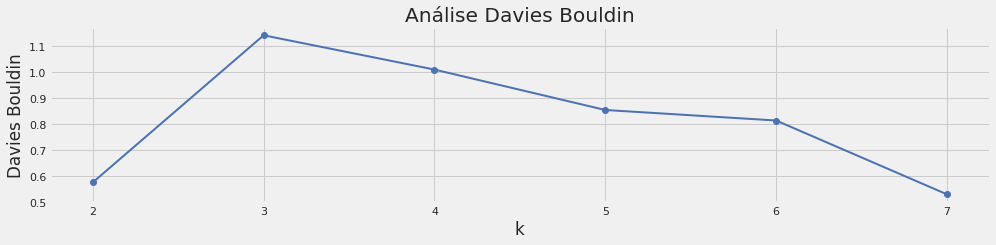

In [ ]:
'''df_scale k & davies_bouldin_ plots'''
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 ,3))
plt.plot(K,davies_bouldin_,'bo-', linewidth=2, markersize=6)

plt.ylabel('Davies Bouldin')
plt.xlabel('k')
plt.title('Análise Davies Bouldin')
plt.show()

##### **High Dimensionality**
##### Clustering algorithms such as KMeans have a difficult time accurately clustering data of high dimensionality (ie. too many features). the dataset is not necessarily highly dimensional as it contains 8 features but even this amount will create issues for KMeans.  As we saw earlier, many clustering algorithms use a distance formula for Euclidean distance to determine cluster membership. When our clustering algorithm has too many dimensions, pairs of points will begin to have very similar distances and we wouldn’t be able to obtain meaningful clusters.

#####  **t-SNE visualization**

##### **t-SNE visualization** is mostly used to understand high-dimensional data and project it into low-dimensional space. Also, is a kind of nonlinear dimensionality reduction. This algorithm allows us to separate data that cannot be separated by any straight line, as you see below.

In [ ]:
from sklearn.manifold import TSNE

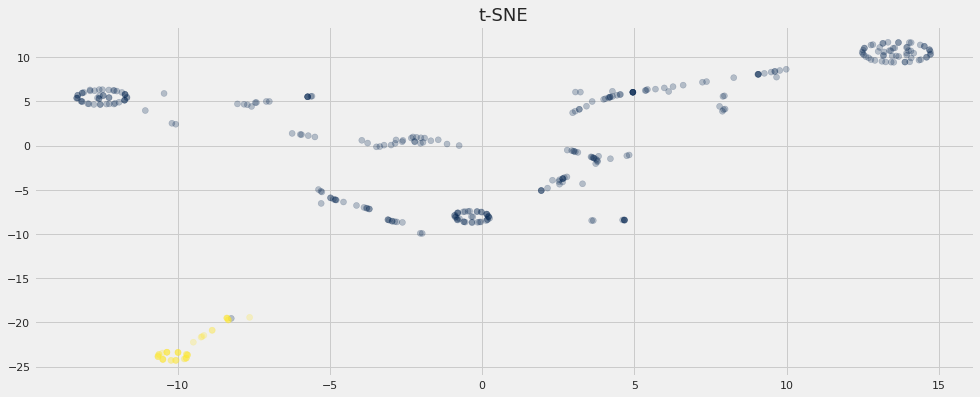

In [ ]:
plt.figure(1 , figsize = (15 ,6))

# Create a TSNE instance: model

modeltSNE = TSNE(n_components=2,learning_rate=100,perplexity=30,early_exaggeration =12,random_state=42,n_iter=1250)

# Apply fit_transform to samples: tsne_features
tsne_features = modeltSNE.fit_transform(df_scale)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]


plt.scatter(xs,ys,c=model_with_Att_Trans_01_df_scale.labels_,cmap='cividis',alpha=0.25) #c=labels_spc,s=50, cmap='viridis','magma','inferno'
plt.title('t-SNE', fontsize=18)
plt.show()

##### t-SNE will takes high-dimensional data and reduces it to a low-dimensional graph, 2-D typically. that way It is also a dimensionality reduction technique, t-SNE can reduce dimensions with non-linear relationships, t-SNE would be a better solution than PCA, in this case because it calculates a similarity measure based on the distance between points instead of trying to maximize variance.  

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 360 samples in 0.002s...
[t-SNE] Computed neighbors for 360 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 360 / 360
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.618176
[t-SNE] KL divergence after 1250 iterations: 0.253900


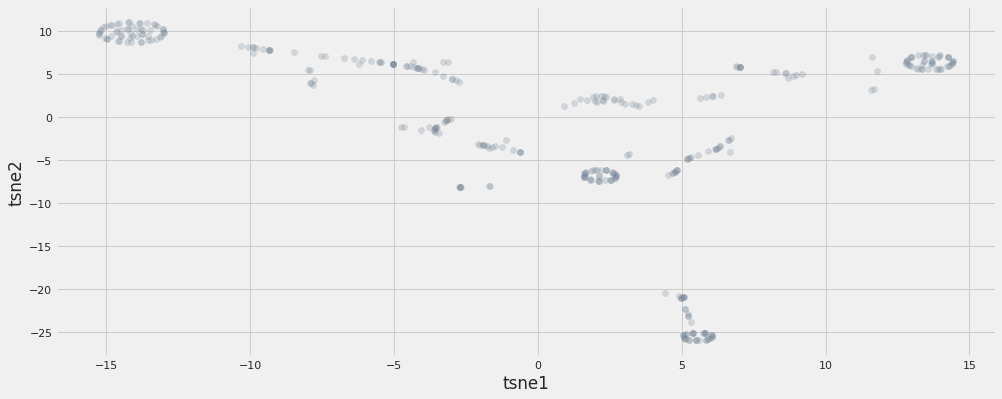

In [ ]:
plt.figure(1 , figsize = (15 ,6))
tsne = TSNE(n_components=2, verbose=1, perplexity=30, early_exaggeration =12, n_iter=1250, learning_rate=100)
tsne_scale_results = tsne.fit_transform(df_scale)


tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25,facecolor='lightslategray' )
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

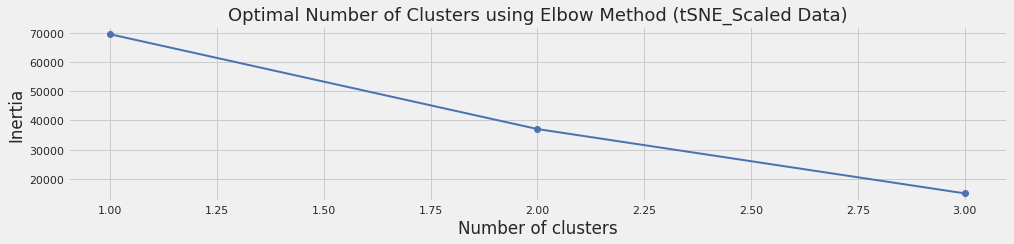

In [ ]:
sse = []
k_list = range(1, 4)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
#plt.plot(K,davies_bouldin_,'bo-', linewidth=2, markersize=6)    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,4), 'SSE': sse})
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,3))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1],'bo-', linewidth=2, markersize=6)
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)', fontsize=18)
plt.xlabel('Number of clusters'), plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans_tsne_scale = KMeans(n_clusters=2, n_init=10, max_iter=300, init='k-means++', random_state=42).fit(tsne_df_scale)

labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

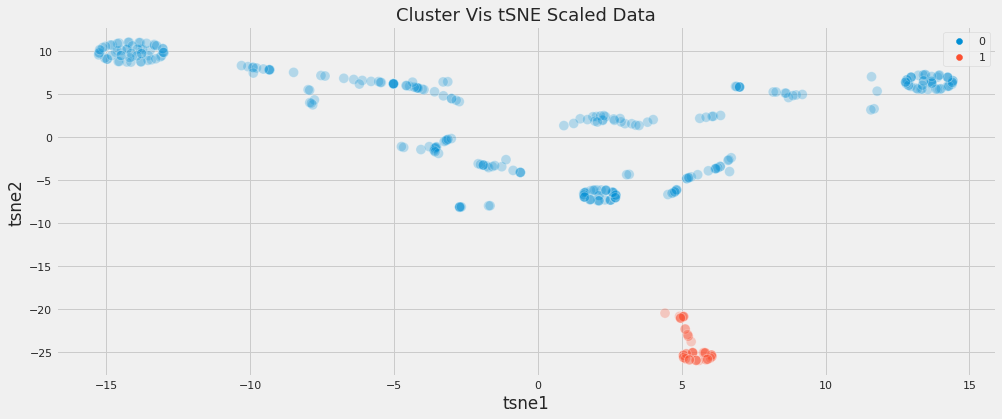

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, cmap='cividis', s=100, alpha=0.25).set_title('Cluster Vis tSNE Scaled Data', fontsize=18)
plt.legend()
plt.show()

In [ ]:
#filter=df[['Production Time', 'Required Time', 'Available Time', 'Planned Maintenance','Planned Process' , 'Planned Equipment', 'Unplanned Process','NA Process', 'Unplanned Equipment', 'Unplanned Standby','Unplanned Unknown','Availability','Utilization']]
y_pred_f = kmeans_tsne_scale.predict(tsne_df_scale)
#y_pred_f = cluster.predict(scd_X)

In [ ]:
df_ae = pd.DataFrame(data,columns=['Production Time', 'Required Time', 'Available Time', 'Planned Maintenance','Planned Process' , 'Planned Equipment', 'Unplanned Process','NA Process', 'Unplanned Equipment', 'Unplanned Standby','Unplanned Unknown','Availability','Utilization'])
df_ae['cluster'] = y_pred_f

TCC01_BI_2019_4_RS_Dataset_f02=df_ae
TCC01_BI_2019_4_RS_Dataset_f02.to_csv("/content/TCC01_BI_2019_4_RS_Dataset_210619-1_filter02.csv")
print(df_ae.head())

   Production Time  Required Time  ...  Utilization  cluster
0             24.0           24.0  ...          1.0        0
1              0.0           24.0  ...          0.0        0
2              0.0           24.0  ...          0.0        0
3              0.0           24.0  ...          0.0        0
4             24.0           24.0  ...          1.0        0

[5 rows x 14 columns]


In [ ]:
df_scale['cluster'] = y_pred_f
TCC01_BI_2019_4_RS_Dataset=df_scale
TCC01_BI_2019_4_RS_Dataset.to_csv("/content/TCC01_BI_2019_4_RS_Dataset_120821.csv")
print(TCC01_BI_2019_4_RS_Dataset.head())

   Planned Maintenance  Planned Equipment  ...  Unplanned Unknown  cluster
0             -0.39018          -0.390181  ...          -0.138005        0
1             -0.39018          -0.390181  ...          -0.138005        0
2             -0.39018          -0.390181  ...          -0.138005        0
3             -0.39018          -0.390181  ...          -0.138005        0
4             -0.39018          -0.390181  ...          -0.138005        0

[5 rows x 9 columns]


In [ ]:
# Getting the Dataset called  TCC01_BI_2019_4_RS_Dataset to present the AE with normal Data Cluster 1

# Smart Way
new_df_ae_ = TCC01_BI_2019_4_RS_Dataset[TCC01_BI_2019_4_RS_Dataset.cluster.isin(["1"])]
print(new_df_ae_)
new_df_ae_.to_csv("/content/newdf_ae_nord_.csv")

In [ ]:
normal=TCC01_BI_2019_4_RS_Dataset[TCC01_BI_2019_4_RS_Dataset['cluster'] == 1]
non_normal= TCC01_BI_2019_4_RS_Dataset[TCC01_BI_2019_4_RS_Dataset['cluster'] == 0]
df = non_normal.append(normal).sample(frac=1).reset_index(drop=True)
#df = non_normal.append(normal)
X = df.drop(['cluster'], axis = 1).values
Y = df.cluster.values

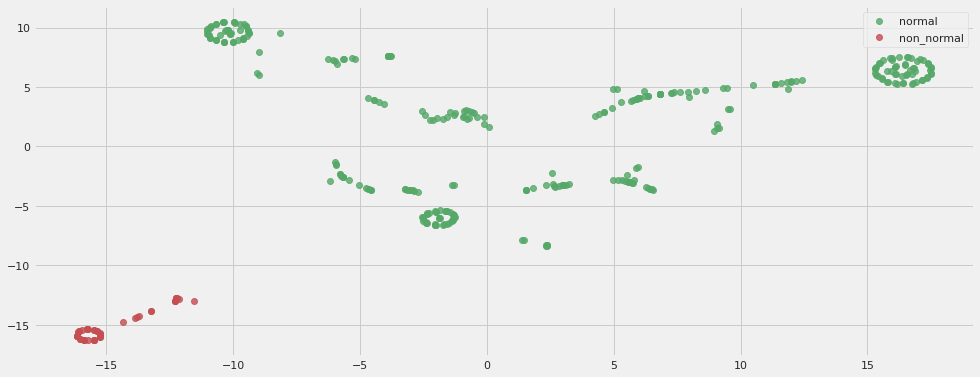

In [ ]:
def tsne_plot(x1, y1, name="graph.png"):

    tsne=TSNE(n_components=2,learning_rate=100,perplexity=30,early_exaggeration =12,random_state=42,n_iter=1250)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(15, 6))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='normal')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='non_normal')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
tsne_plot(X, Y, "original.png")

#### **Auto Encoder and t-SNE :**
##### The AE application for dimensionality reduction and t-SNE for 2D visualization is probably the best algorithm around, but it typically requires relatively low-dimensional data. So a good wokflow for visualizing similarity relationships in high-dimensional data is to start by using an autoencoder to compress the data into a low-dimensional space, then use t-SNE for mapping the compressed data to a 2D plane.

##### The autoencoder is an unsupervised machine learning algorithm that takes an array as input and tries to reconstruct it using fewer number of bits from the bottleneck also known as latent space. While training the model it learns how the features will look like for normal data and compress it into a small element and decode it back as the input with a small error. When an anomaly is sent through the model, it will fail to reproduce it, since it is trained to reproduce only normal data and will end up with a large MSE. What we need to do is calculate MSE of the output compared to input and to properly differentiate the anomalies, by checking the outputs we need to set a threshold value for MSE according to our need so that it predicts with good precision and recall.

In [ ]:
# Anomaly Detections Libraries

from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
## input layer 
input_layer = Input(shape=(X.shape[1],))

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='tanh')(encoded)

## decoding part
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
#output_layer = Dense(X.shape[1], activation='sigmoid')(decoded)
output_layer = Dense(X.shape[1], activation='relu')(decoded)

##### As shown above the autoencoder is divided into two parts: the encoder and the decoder. 

In [ ]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adam", 
                    loss="mse") # optimizer=["SGD",""adam"","adadelta"]

In [ ]:
x = TCC01_BI_2019_4_RS_Dataset.drop(["cluster"], axis=1)
y = TCC01_BI_2019_4_RS_Dataset["cluster"].values

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)
x_normal, x_non_normal = x_scale[y == 1], x_scale[y == 0]


In [ ]:
autoencoder.fit(x_normal, 
                x_normal, 
                batch_size = 32, 
                epochs = 10, 
                shuffle = True,
                validation_split = 0.20); 

Epoch 1/10
2/2 [==============================] - 15s 523ms/step - loss: 0.3030 - val_loss: 0.1451
Epoch 2/10
2/2 [==============================] - 0s 21ms/step - loss: 0.1519 - val_loss: 0.1004
Epoch 3/10
2/2 [==============================] - 0s 23ms/step - loss: 0.1028 - val_loss: 0.0613
Epoch 4/10
2/2 [==============================] - 0s 24ms/step - loss: 0.0602 - val_loss: 0.0381
Epoch 5/10
2/2 [==============================] - 0s 27ms/step - loss: 0.0351 - val_loss: 0.0283
Epoch 6/10
2/2 [==============================] - 0s 24ms/step - loss: 0.0260 - val_loss: 0.0245
Epoch 7/10
2/2 [==============================] - 0s 23ms/step - loss: 0.0216 - val_loss: 0.0221
Epoch 8/10
2/2 [==============================] - 0s 23ms/step - loss: 0.0208 - val_loss: 0.0199
Epoch 9/10
2/2 [==============================] - 0s 26ms/step - loss: 0.0189 - val_loss: 0.0176
Epoch 10/10
2/2 [==============================] - 0s 26ms/step - loss: 0.0165 - val_loss: 0.0148


##### Auto Encoder Neural Network  topology summary

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               900       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 808       
Total params: 14,408
Trainable params: 14,408
Non-trainable params: 0
_________________________________________________________

In [ ]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

##### **here is the process of drawing conclusions about an underlying population based on a sample of non normal or subset of the data by inference over a hidden representation encoder or latent space (autoencoder.layers[2]).**

In [ ]:
normal_hid_rep = hidden_representation.predict(x_normal[:360])
non_normal_hid_rep = hidden_representation.predict(x_non_normal)

<Figure size 1080x432 with 0 Axes>

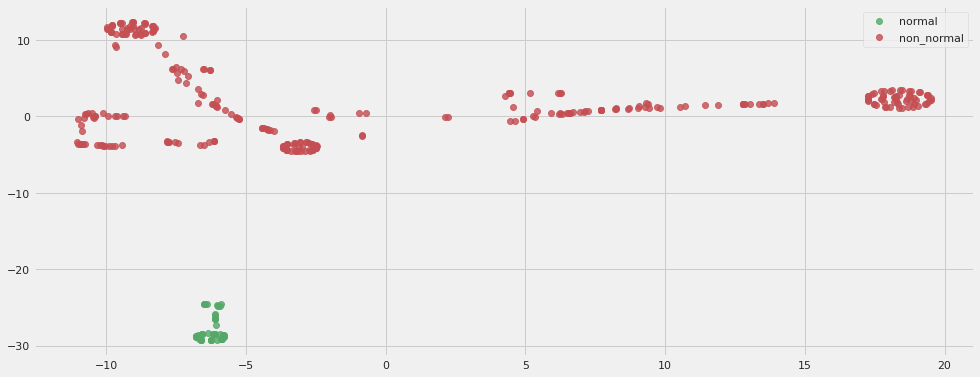

In [ ]:
rep_x = np.append(normal_hid_rep, non_normal_hid_rep, axis = 0)
y_n = np.zeros(normal_hid_rep.shape[0])
y_f = np.ones(non_normal_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
plt.figure(1 , figsize = (15 ,6))
tsne_plot(rep_x, rep_y, "latent_representation.png")
plt.show()

##### **Here`s the takeaway**

##### Oftentimes, relevant data occupies only a small portion of the ambient large-dimensional vector space.
Working with that smaller space increases efficiency, saves resources, and reveals relevant structure in the data.

#### **Classification and Scores Model**

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90


Accuracy Score:  1.0


##### With the dataset now we have, we can choose a classical ML model, a Logistic Regression Classifier. This enables precise prediction of actual anomalies we want to be predicted by eliminating the false positives in the final output.

##### Detecting anomalies is only a first step. Explaining why they are anomalies is the main goal. If can’t explain the findings, the subspace method is unhelpful and this will be part of scope of the Reliability engineer who is the subject matter expert.

##### There is usually an inverse relationship between model flexibility / performace and interpretability.   So the best model is a parsimonious and interpretable model that fulfill the final users expectations.

##### In primary industrial ecosystems (commodity), the most uses cases in the first floor control process applications , the streaming data ingestion, data processing are the standart for process variables in time series. **Other applications of  SPC  users in the same market is the reportability  of maintenance metrics wich feeded offline to support decision makers**.

##### Statistical methods to monitor a process off line for TS.
##### Anomaly definition: Often carried out through a visual display of the data: for instance control charts for Utilization, the main Kpi of result observed here, if the data exceeds the threshold 0.8 for a pre-defined statistic scalar.                                             Application, Could be use two sets of statistics:     Mean and standard deviation and Cumulative sum.

##### Statistical Process Control Benefits:

##### Reduce scrap and rework.
##### Increase productivity.
##### Improve overall quality.
##### Match process capability to product requirement.
##### Continuously monitor process to maintaining control.
##### Provide data to support decision making.
##### Streamline the process.
##### Increase in assets reliability.
##### Opportunity for company-wide improvements.

#### Bonus Truck: Statistical methods used to monitor a process off line.

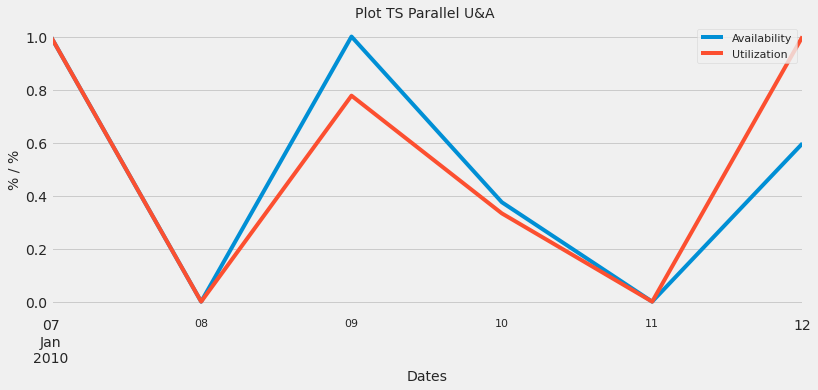

In [ ]:
#df.Production_Time.plot()
data = pd.read_csv('/content/0206DatasetCH01TCCBI_csv.csv', sep=';', header='infer',decimal=',',index_col='Dates', parse_dates=True)#
df = pd.DataFrame(data)
df[['Availability','Utilization']].loc['2010-01-01':'2010-01-30'].plot(figsize=(12,5))#,'b.--'
# Decorations
plt.style.use('fivethirtyeight')
plt.xlabel('Dates',fontsize=14)
plt.ylabel('% / %',fontsize=14)
plt.legend(loc='upper right')
plt.title('Plot TS Parallel U&A ', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax.get_figure().savefig("TS UTilization & Availability.png")
plt.show()

In [ ]:
def control_plot(time_series, threshold):
    '''
    Creates a one-sided control plot from a time series
    (that is, plots threshold below the mean but not above)
    Also, returns list of points that exceed the threshold
    i.e., points for which the value < mean + threshold*(standard deviation)
    
    Args: 
        time_series: (pandas dataframe; index column is date in datetime format and  
        column 0 is data)
        threshold: z-score threshold for anomaly detection (float)

    Returns: 
        Control plot of time_series    
        anomalies: anomalies that exceed threshold (pandas dataframe)
    ''' 
    mean_= time_series.iloc[:,0].mean()
    stdev_= time_series.iloc[:,0].std()
    cutoff = mean_- threshold*stdev_
    rcParams['figure.figsize'] = 12, 5
    time_series.plot(ax=plt.gca())

    # Decorations
    
    plt.axhline(y=mean_, color='g', linestyle='--', label='mean',linewidth=1.5)
    # Threshold to plot line at threshold*stdev_ times away from the mean
    plt.axhline(y=cutoff, color='r', linestyle=':', label='threshold',linewidth=1.5)
    plt.style.use('fivethirtyeight')
    plt.legend(loc='upper right')
    plt.title('SPC_Control_Chart_Utilization',fontsize=14)
    plt.xlabel('Dates',fontsize=14)
    plt.ylabel('Utilization (%/%)',fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Create dataframe of anomalies that exceed the cutoff
    anomalies = time_series[time_series.values < cutoff]
    return anomalies

##### Set a threshold of one standard deviations and plot the results.

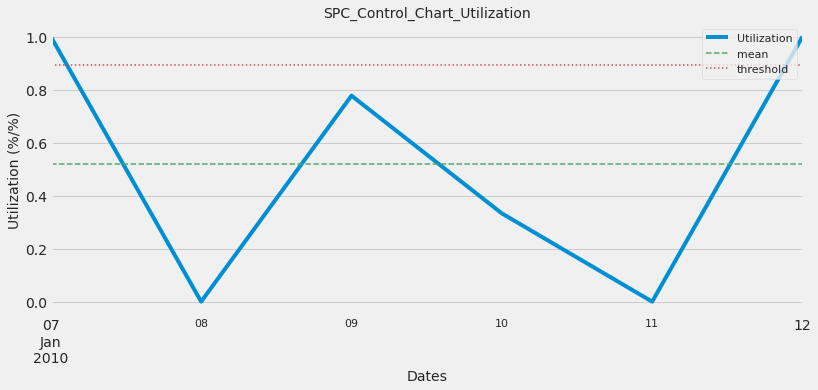

In [ ]:
anomaly_Utilization = control_plot(df[['Utilization']].loc['2010-01-01':'2010-01-30'],-0.8) 
ax.get_figure().savefig("SPC_Control_Chart_Utilization.png")
#anomaly_Availability  = control_plot(df[['Availability']].loc['2010-01-01':'2010-01-30'],3) 

In [ ]:
print(anomaly_Utilization)

            Utilization
Dates                  
2010-01-08        0.000
2010-01-09        0.777
2010-01-10        0.333
2010-01-11        0.000


In [ ]:
df.Utilization.describe()

count    360.000000
mean       0.553606
std        0.479013
min        0.000000
25%        0.000000
50%        0.913500
75%        1.000000
max        1.000000
Name: Utilization, dtype: float64

In [ ]:
def cusum(data, mean, shift, threshold):
    '''
    Calculate the low cumulative sums and use these for anomaly detection. 
    An anomaly is reported if the cumulative sums are beyong a given threshold.
    
    Args: 
        data: (a time series as pandas dataframe; index column is date in datetime format and  
        column 0 is data)
        mean:  mean of the data or other average (float)
        shift: normal shift in the data; standard deviation is recommend (float)
        threshold: threshold to classify point as anomaly (float)

    Returns: 
        cusum: the low cumulative sums together with data (pandas dataframe)  
        anomalies: anomalies that below threshold (pandas dataframe)
    ''' 
    low_sum = 0.0
    anomalies = [] 
    low_sum_final = []
    index_names = data.index
    data_values = data.values
    for index, item in enumerate(data_values):
        low_sum = min(0, low_sum + item - mean + shift)
        low_sum_final.append(low_sum)
        if low_sum < -threshold:
            anomalies.append((index_names[index], item.tolist()))
    cusum = data
    cusum = cusum.assign(Low_Cusum=low_sum_final) 
    return cusum, anomalies

In [ ]:
def cusum_plot(time_series, threshold):
    '''
    Plot the low cumulative sums and use these for anomaly detection. 
    An anomaly is reported if the cumulative sums are beyong a given threshold.
    
    Args: 
        time_series: (a time series as pandas dataframe; index column is date 
        in datetime format and column 0 is data)
        threshold: threshold to classify point as anomaly (float)

    Returns: 
        A plot of the data with the low cumulative sum.
        cusum_results: the low cumulative sums together with data 
        and any anomalies that below threshold (pandas dataframe; 
        from cumsum function)
    ''' 
    # Use the mean and standard deviation of the whole time series 
    # to calculate cumulative sums
    mean_= time_series.iloc[:,0].mean()
    stdev_= time_series.iloc[:,0].std()
    
    # define threshold in terms of standard deviation
    cusum_results = cusum(time_series, mean_, stdev_, threshold*stdev_)
    ax=time_series.plot()
    ax.axhline(y=mean_, color='g', linestyle='--',label='average',linewidth=1.5)
    ax.axhline(y=mean_-threshold*stdev_, color='r', linestyle='--',label='Low threshold',linewidth=1.5)
    # Use threshold to plot line at threshold*stdev_ times away from the mean
    ax.scatter(x=cusum_results[0].index, y=cusum_results[0]['Low_Cusum'], 
             color='k', linestyle=':',label='Low Cusum') 
    rcParams['figure.figsize'] = 12, 5  
    plt.style.use('fivethirtyeight')                  
    plt.legend(loc='upper right')
    plt.title('SPC_Low_Cusum_Utilization',fontsize=14)
    plt.xlabel('Dates',fontsize=14)
    plt.ylabel( 'Utilization (%/%)',fontsize=14)
    plt.show()
    
    return cusum_results

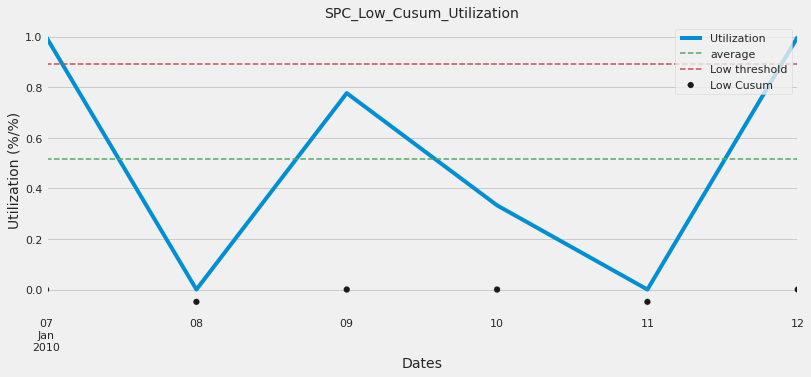

In [ ]:
cusum_plot(df[['Utilization']].loc['2010-01-01':'2010-01-30'],-0.8) 
ax.get_figure().savefig("SPC_Control_Chart_Utilization.png")